In [56]:
import pandas as pd
import math
import matplotlib.pyplot as plt
cmap = ['red', 'yellow', 'black', 'blue', 'pink','magenta','green']

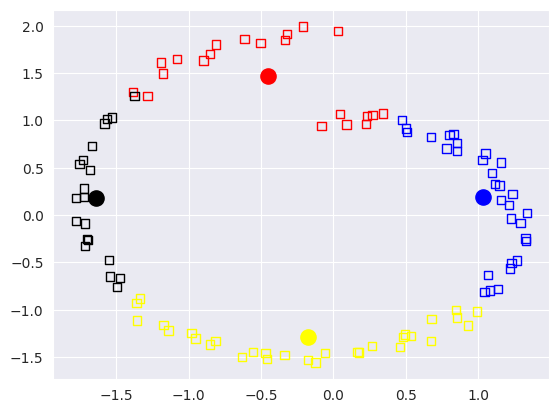

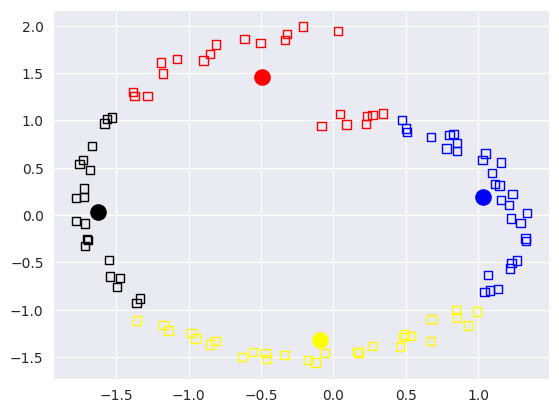

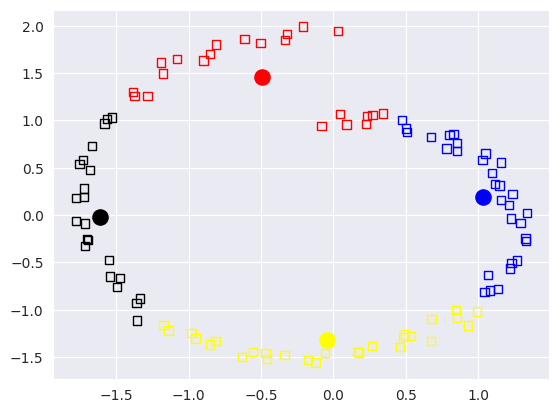

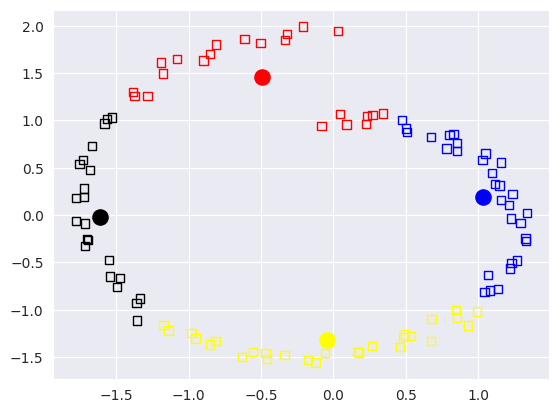

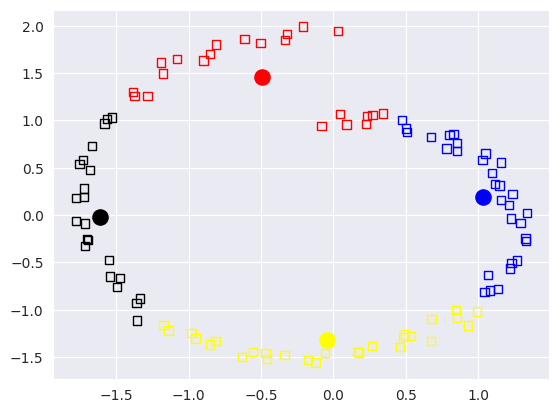

In [74]:
def k_mean(samples, sample_names, m, iters):
    df_names = pd.read_csv(sample_names, sep="\t", header=None)
    df = pd.read_csv(samples, delim_whitespace=True, header=None, names=df_names[0])

    random_centers = df.sample(m).values.tolist()
    distances = []
    min_distances = []
    for _ in range(iters):
        for s in df.values.tolist():
            for v in random_centers:
                distances.append(math.dist(s,v))
        
            min_distances.append(distances.index(min(distances)))
            distances.clear()
            
        for j in range(m):
            x_gr = []
            for i, z in enumerate(min_distances):
                if z == j:
                    x_gr.append(df.values[i].tolist())
            
            if len(x_gr) == 0:
                continue
            
            x_new = 0
            y_new = 0
            for i in x_gr:
                x_new += i[0]
                y_new += i[1]
                plt.scatter(i[0], i[1], marker='s', facecolors='none', edgecolors=cmap[j])
            
            random_centers[j] = [x_new / len(x_gr), y_new / len(x_gr)]
        for i, center in enumerate(random_centers):
            plt.scatter(center[0], center[1], marker='o', s=120, color=cmap[i])
        
        min_distances.clear()
        plt.show()
    
    
k_mean("spirala.txt", "spirala-type.txt", 4, 5)